In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import re
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from sklearn.preprocessing import minmax_scale
import IPython.display as ipd

plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['font.size'] = 16
warnings.filterwarnings("ignore")

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
import os

# Set Kaggle API credentials path
os.environ['KAGGLE_CONFIG_DIR'] = '/root/.kaggle/'

# Download the dataset
!kaggle datasets download -d iamhungundji/dysarthria-detection

# Unzip the downloaded file
!unzip -q '*.zip' -d data

 89% 138M/155M [00:01<00:00, 132MB/s]
100% 155M/155M [00:01<00:00, 137MB/s]


# Data Visualization and EDA

In [4]:
directory = '/content/data/dysarthria_detection'
data = pd.read_csv("/content/data/dysarthria_detection/torgo_data/data.csv")
data['filename'] = data['filename'].apply(lambda x: os.path.join(directory,x))
data

,is_dysarthria,gender,filename
0,non_dysarthria,female,/content/data/dysarthria_detection/torgo_data/...
1,non_dysarthria,female,/content/data/dysarthria_detection/torgo_data/...
2,non_dysarthria,female,/content/data/dysarthria_detection/torgo_data/...
3,non_dysarthria,female,/content/data/dysarthria_detection/torgo_data/...
4,non_dysarthria,female,/content/data/dysarthria_detection/torgo_data/...
...,...,...,...
1995,dysarthria,male,/content/data/dysarthria_detection/torgo_data/...
1996,dysarthria,male,/content/data/dysarthria_detection/torgo_data/...
1997,dysarthria,male,/content/data/dysarthria_detection/torgo_data/...
1998,dysarthria,male,/content/data/dysarthria_detection/torgo_data/...


## Functions for Visualizations


In [ ]:
def show_waveplot(audio_path,label,gender):
    x , sr = librosa.load(audio_path)
    plt.figure(figsize=(20, 6))
    librosa.display.waveshow(x, sr=sr)
    plt.title(f"Waveplot: of Class: {label}, Gender: {gender}")

def show_spectrogram(audio_path,label,gender):
    x , sr = librosa.load(audio_path)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(20,6))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz',cmap='plasma')
    plt.colorbar()
    plt.title(f"Spectrogram of Class: {label}, Gender: {gender}")

def show_zcr(audio_path,label,gender):
    x , sr = librosa.load(audio_path)
    zero_crossings = librosa.zero_crossings(x)
    print("Sum of zero crossing ", zero_crossings.sum())
    plt.figure(figsize=(20, 5))
    plt.title(f'Zero Crossing Rate of Class: {label}, Gender: {gender}')
    zcrs = librosa.feature.zero_crossing_rate(x)
    plt.plot(zcrs[0])
    plt.show()

def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

def show_spectral_centroids(audio_path,label,gender):
    plt.figure(figsize=(20, 5))
    plt.title(f'Spectral Centroids of Class: {label}, Gender: {gender}')
    x , sr = librosa.load(audio_path)
    spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    librosa.display.waveshow(x, sr=sr, alpha=0.4)
    plt.plot(t, normalize(spectral_centroids), color='r')
    plt.show()

def show_spectral_rolloff(audio_path,label,gender):
    plt.figure(figsize=(20, 5))
    plt.title(f'Spectral Rolloff of Class: {label}, Gender: {gender}')
    x , sr = librosa.load(audio_path)
    spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr, roll_percent=0.01)[0]
    frames = range(len(spectral_rolloff))
    t = librosa.frames_to_time(frames)
    librosa.display.waveshow(x, sr=sr, alpha=0.4)
    plt.plot(t, normalize(spectral_rolloff), color='r')
    plt.show()

def show_mfccs(audio_path,label,gender):
    plt.figure(figsize=(20, 6))
    plt.title(f'MFCC of Class: {label}, Gender: {gender}')
    x , sr = librosa.load(audio_path)
    mfccs = librosa.feature.mfcc(y=x, sr=sr)
    librosa.display.specshow(mfccs, sr=sr, x_axis='time',cmap='plasma')
    plt.show()

def show_melspectro(audio_path,label,gender):
    plt.figure(figsize=(20, 6))
    plt.title(f'Mel Spectro of Class: {label}, Gender: {gender}')
    x , sr = librosa.load(audio_path)
    melspectro = librosa.feature.melspectrogram(y=x, sr=sr)
    librosa.display.specshow(melspectro, sr=sr, x_axis='time',cmap='plasma')
    plt.show()

In [ ]:
data.sample(frac=1).reset_index(drop=True,inplace=True)
male_dysarthric = data[(data['gender']=='male') & (data['is_dysarthria']=='dysarthria')].sample(1)
female_dysarthric = data[(data['gender']=='female') & (data['is_dysarthria']=='dysarthria')].sample(1)
male_ndysarthric = data[(data['gender']=='male') & (data['is_dysarthria']=='non_dysarthria')].sample(1)
female_ndysarthric = data[(data['gender']=='female') & (data['is_dysarthria']=='non_dysarthria')].sample(1)

## Male and Dysarthric

In [ ]:
ipd.Audio(male_dysarthric.iloc[0].filename)

## Female and Dysarthric

In [ ]:
ipd.Audio(female_dysarthric.iloc[0].filename)

## Male and Non Dysarthric

In [ ]:
ipd.Audio(male_ndysarthric.iloc[0].filename)

## Female and Dysarthric

In [ ]:
ipd.Audio(female_ndysarthric.iloc[0].filename)

## Waveplots

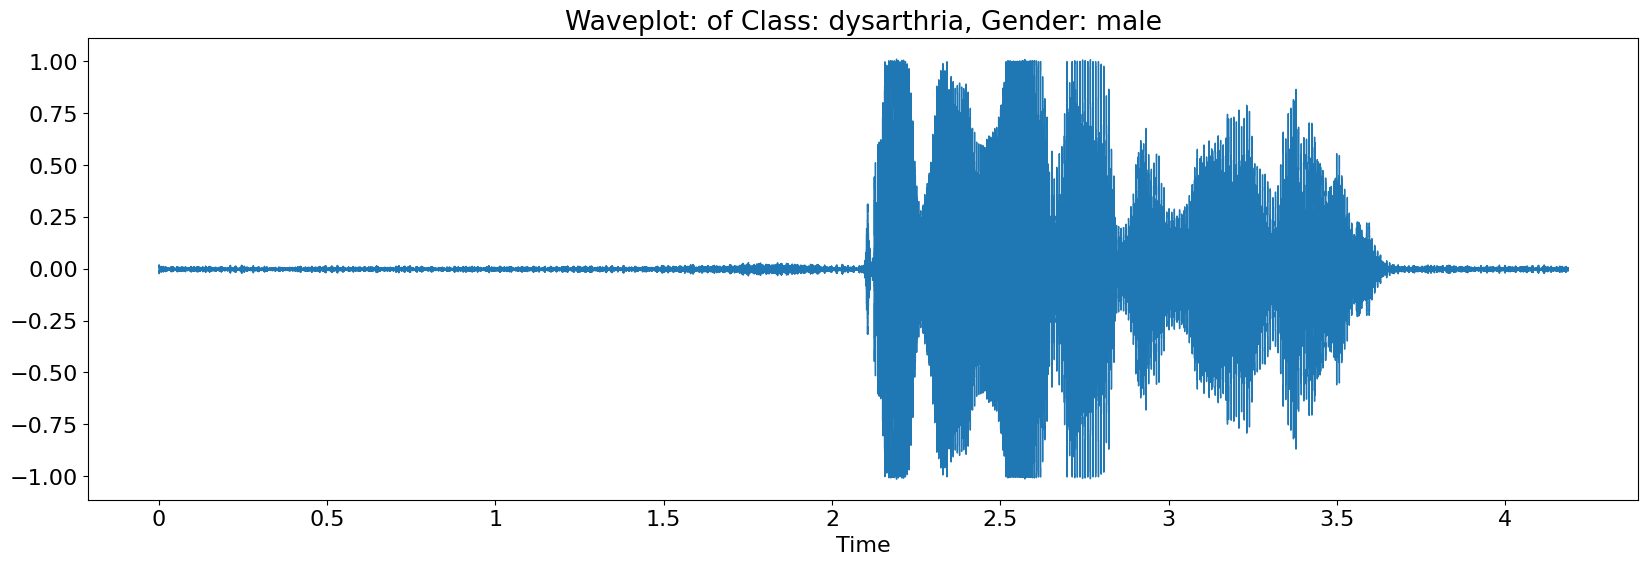

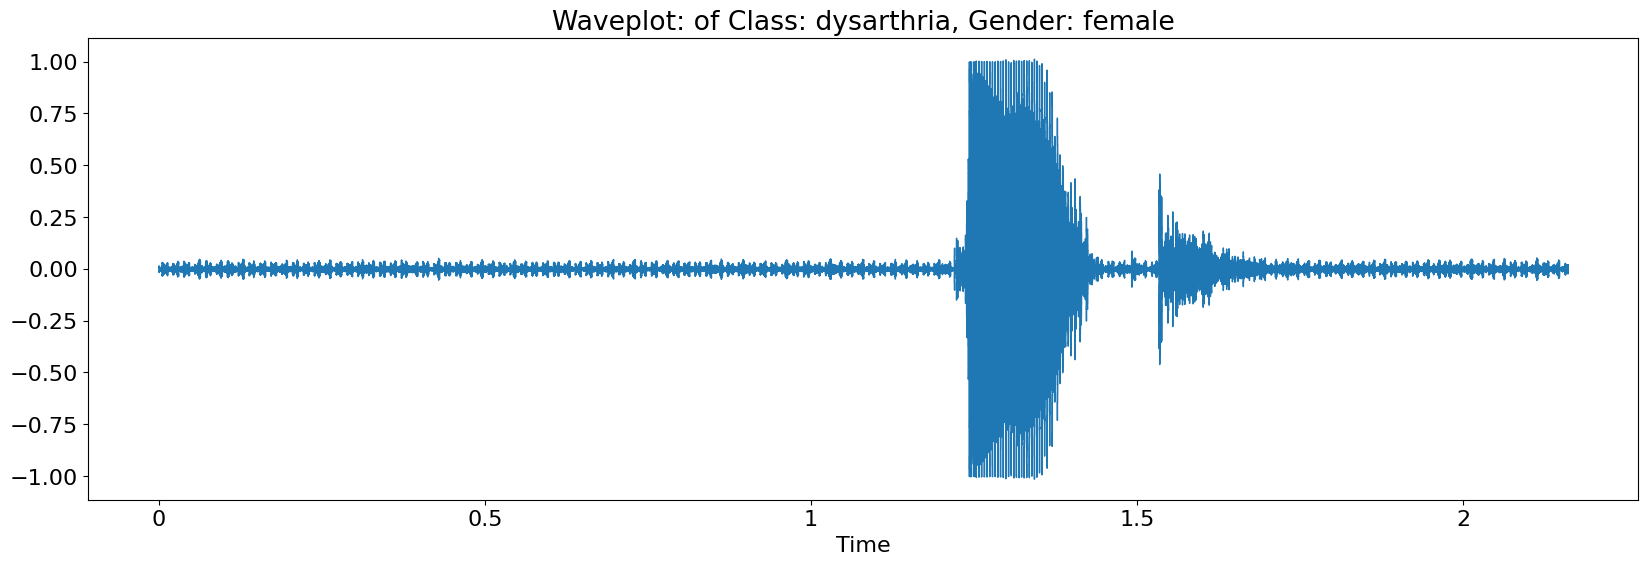

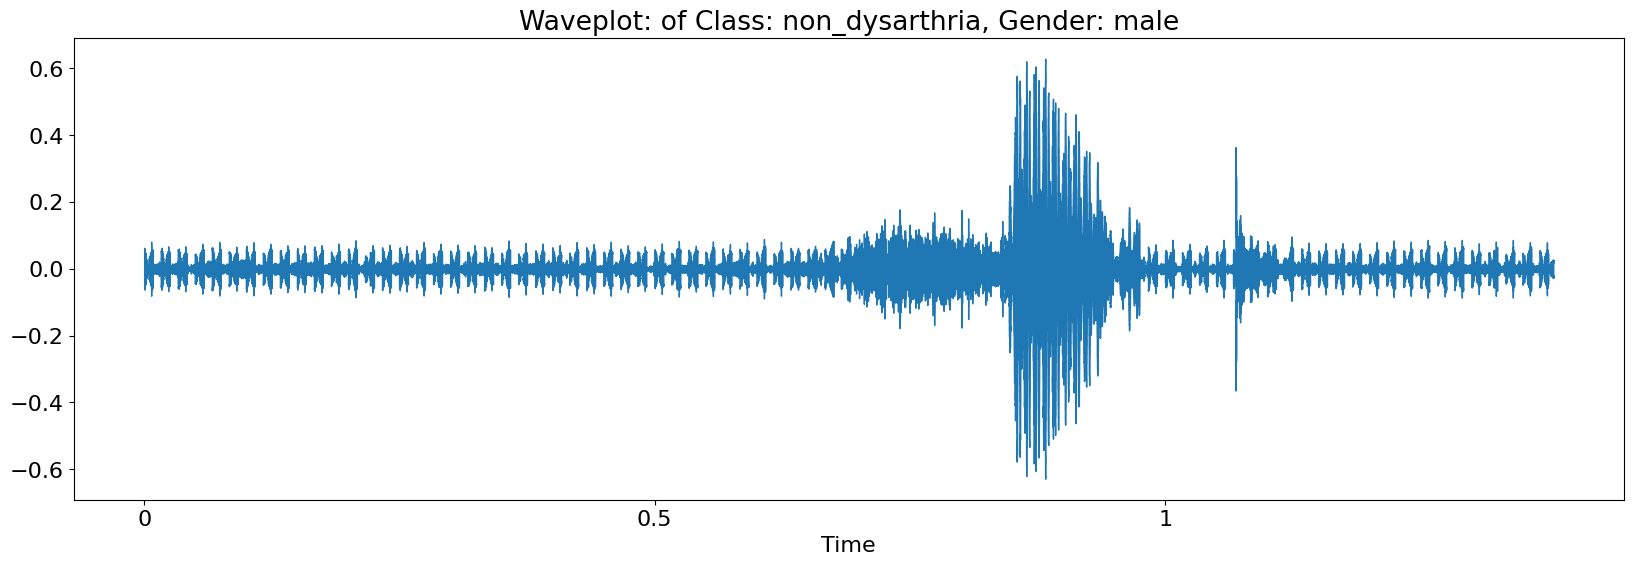

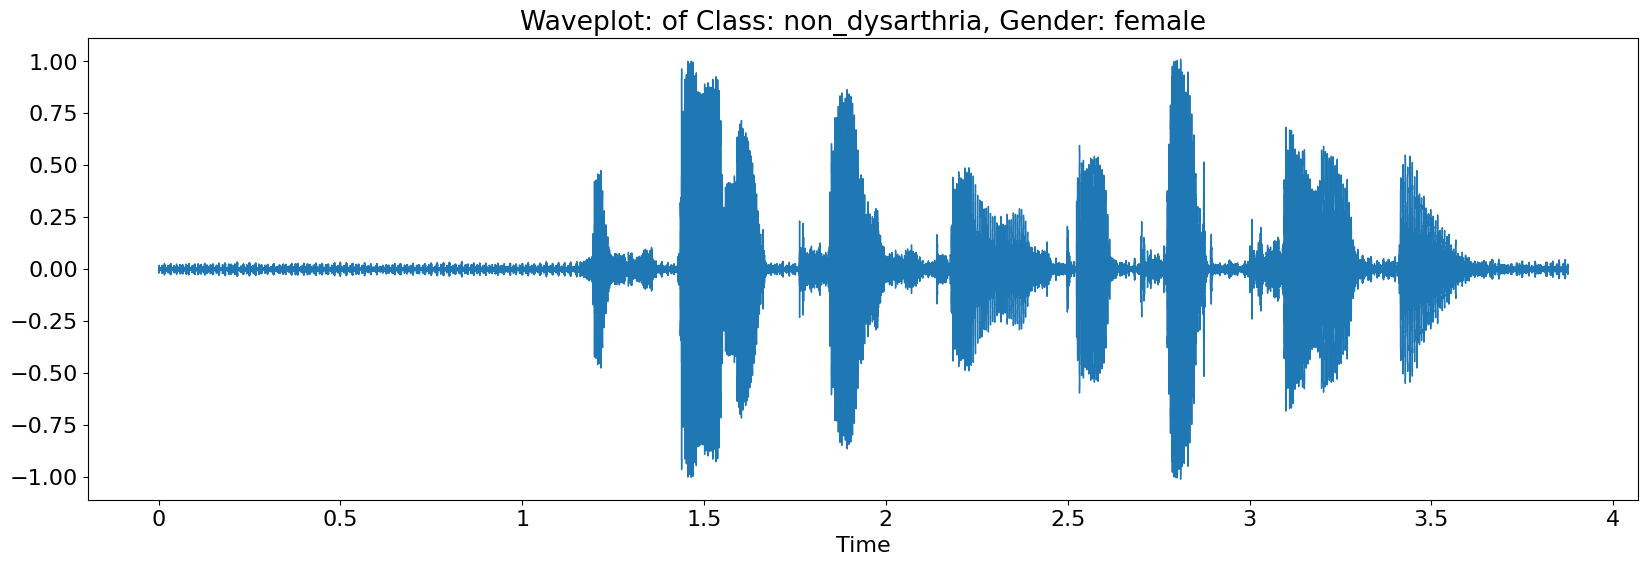

In [ ]:
show_waveplot(male_dysarthric.iloc[0].filename, male_dysarthric.iloc[0].is_dysarthria, male_dysarthric.iloc[0].gender)
show_waveplot(female_dysarthric.iloc[0].filename, female_dysarthric.iloc[0].is_dysarthria, female_dysarthric.iloc[0].gender)
show_waveplot(male_ndysarthric.iloc[0].filename, male_ndysarthric.iloc[0].is_dysarthria, male_ndysarthric.iloc[0].gender)
show_waveplot(female_ndysarthric.iloc[0].filename, female_ndysarthric.iloc[0].is_dysarthria, female_ndysarthric.iloc[0].gender)

## Spectrograms


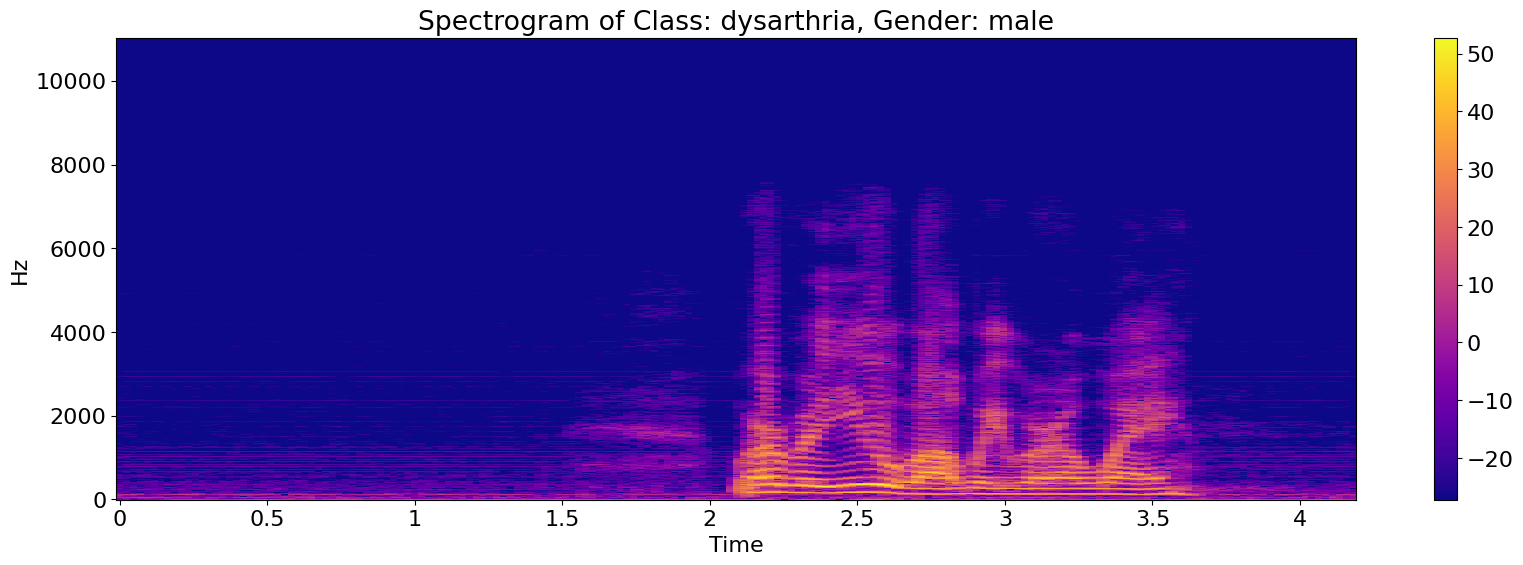

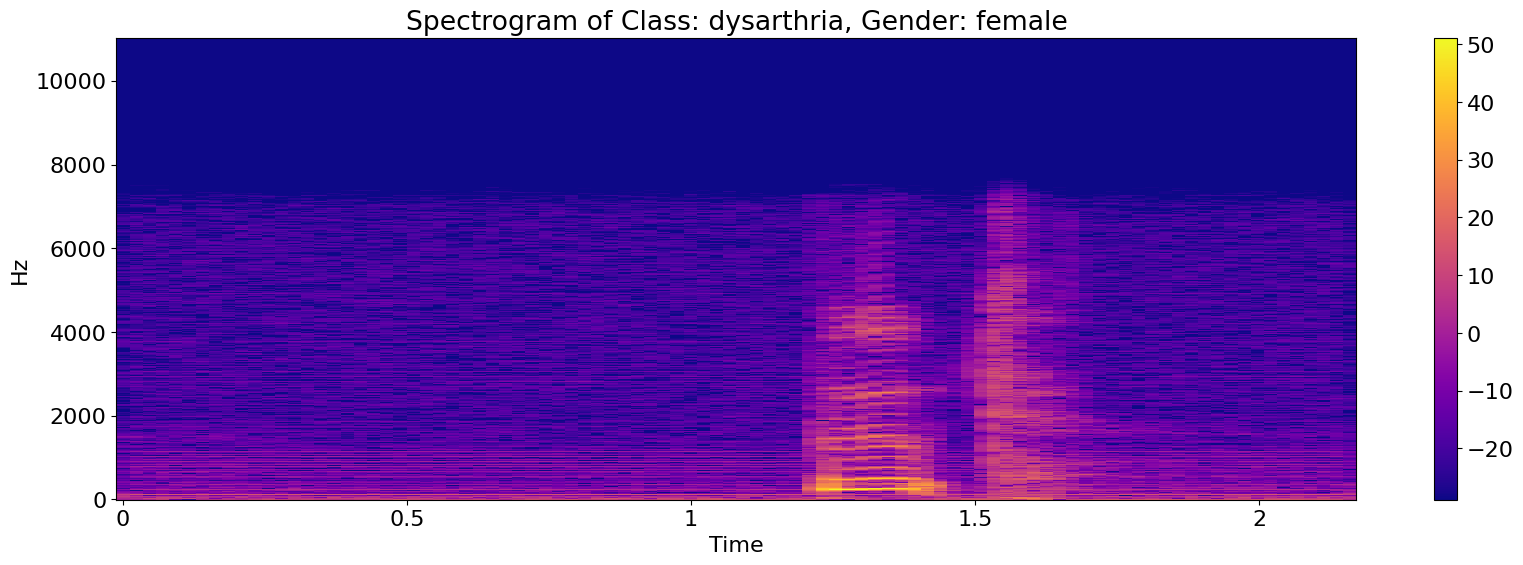

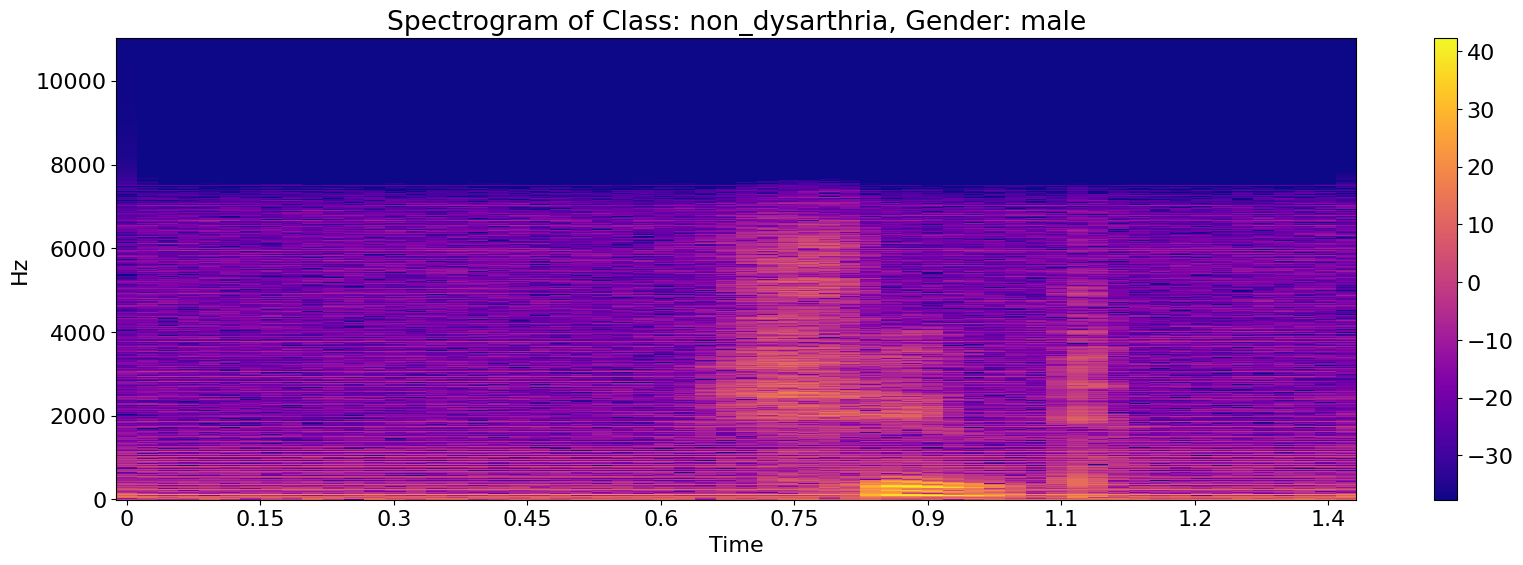

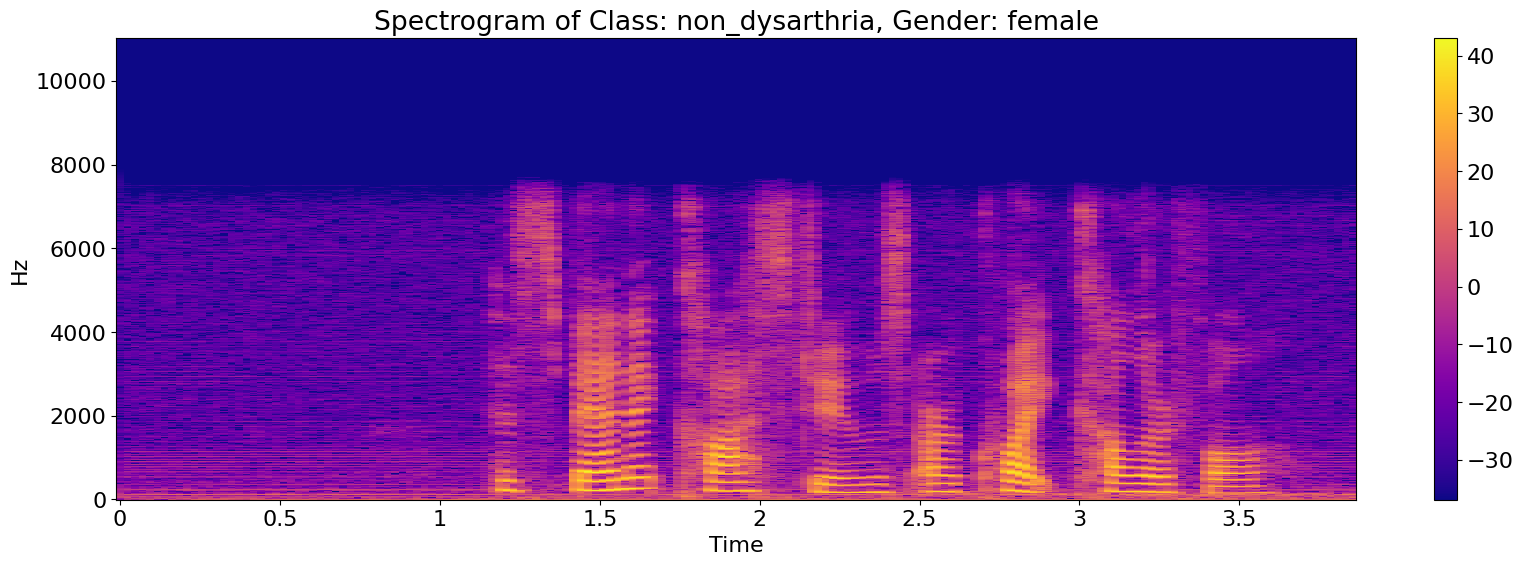

In [ ]:
show_spectrogram(male_dysarthric.iloc[0].filename, male_dysarthric.iloc[0].is_dysarthria, male_dysarthric.iloc[0].gender)
show_spectrogram(female_dysarthric.iloc[0].filename, female_dysarthric.iloc[0].is_dysarthria, female_dysarthric.iloc[0].gender)
show_spectrogram(male_ndysarthric.iloc[0].filename, male_ndysarthric.iloc[0].is_dysarthria, male_ndysarthric.iloc[0].gender)
show_spectrogram(female_ndysarthric.iloc[0].filename, female_ndysarthric.iloc[0].is_dysarthria, female_ndysarthric.iloc[0].gender)

## Zero Crossing Rate
-

Sum of zero crossing  3394


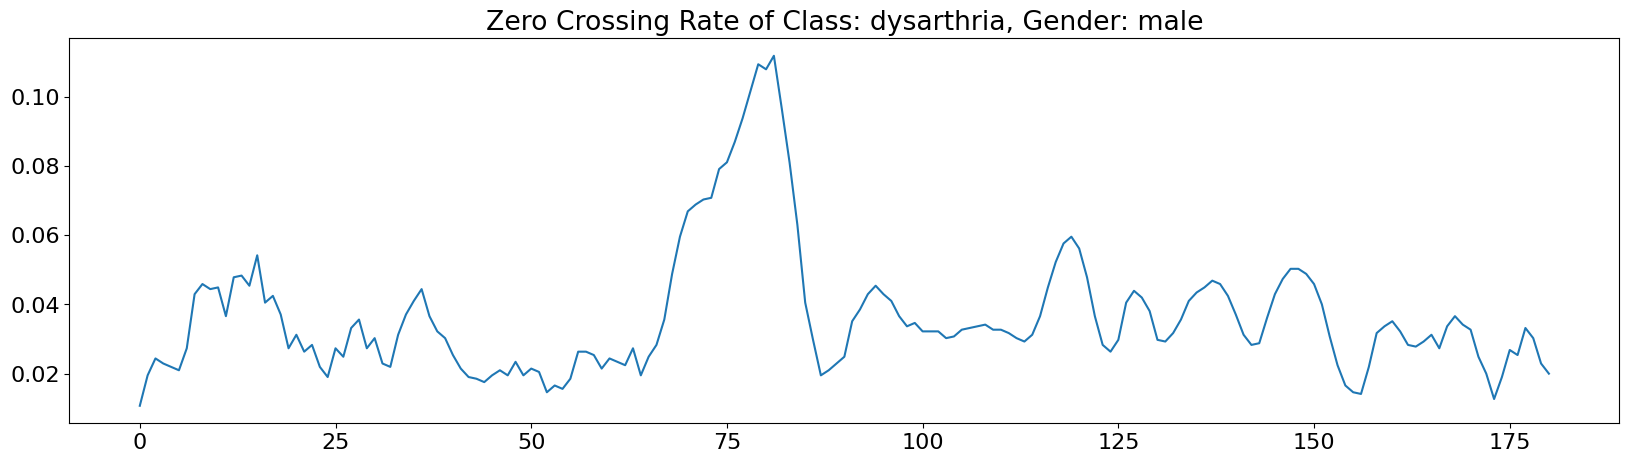

Sum of zero crossing  4121


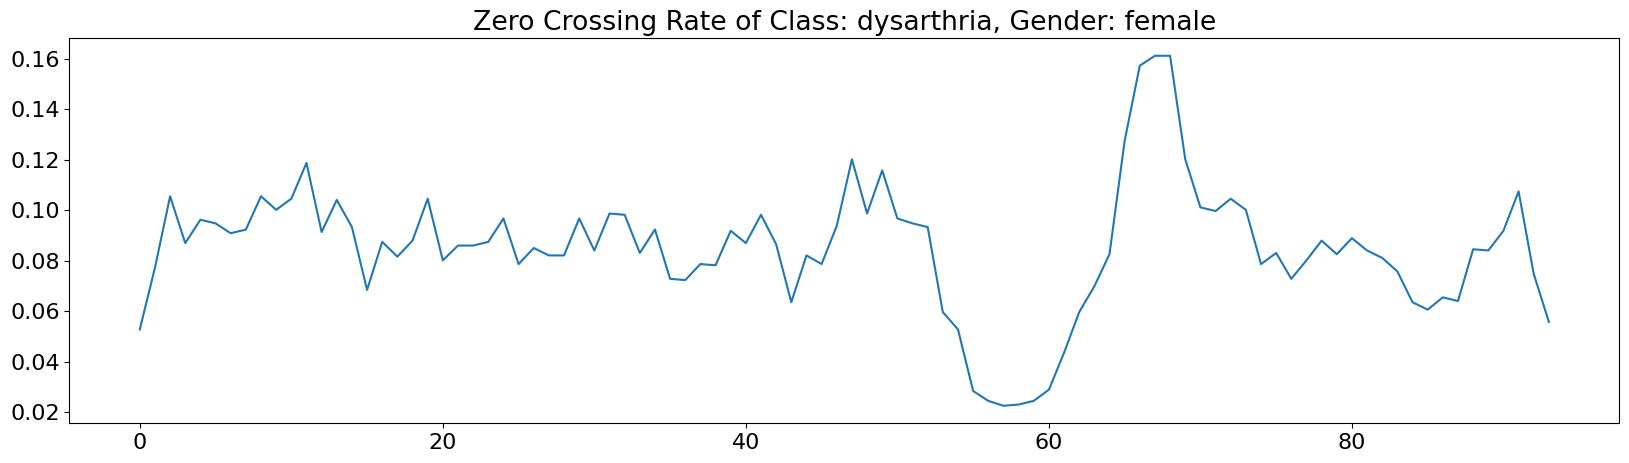

Sum of zero crossing  2469


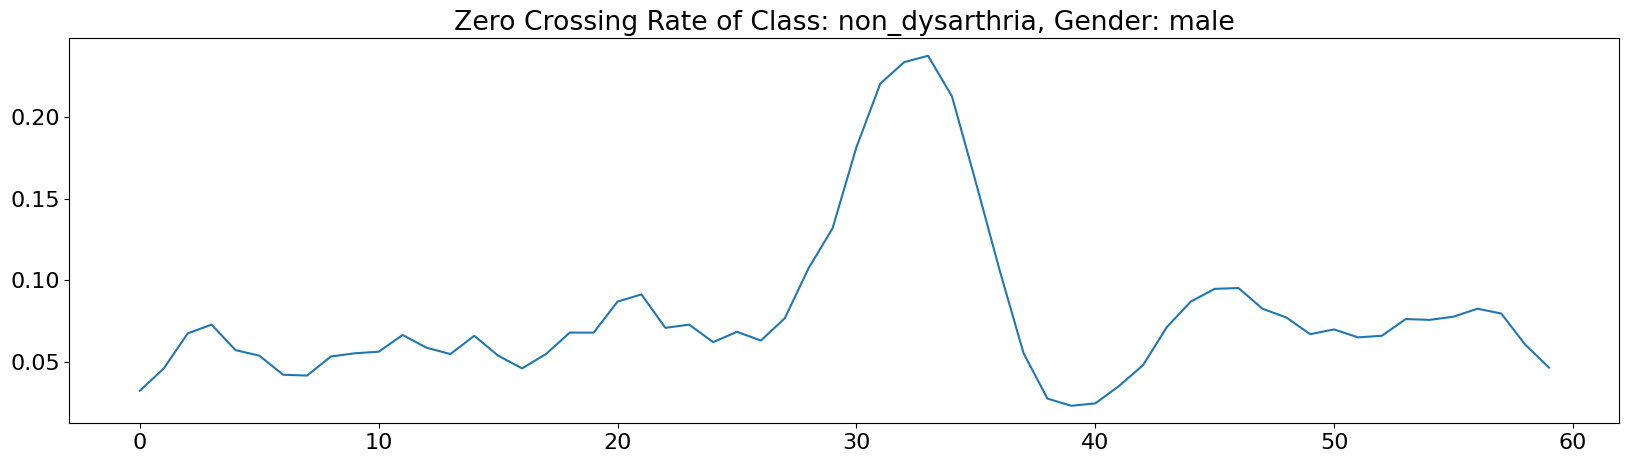

Sum of zero crossing  8265


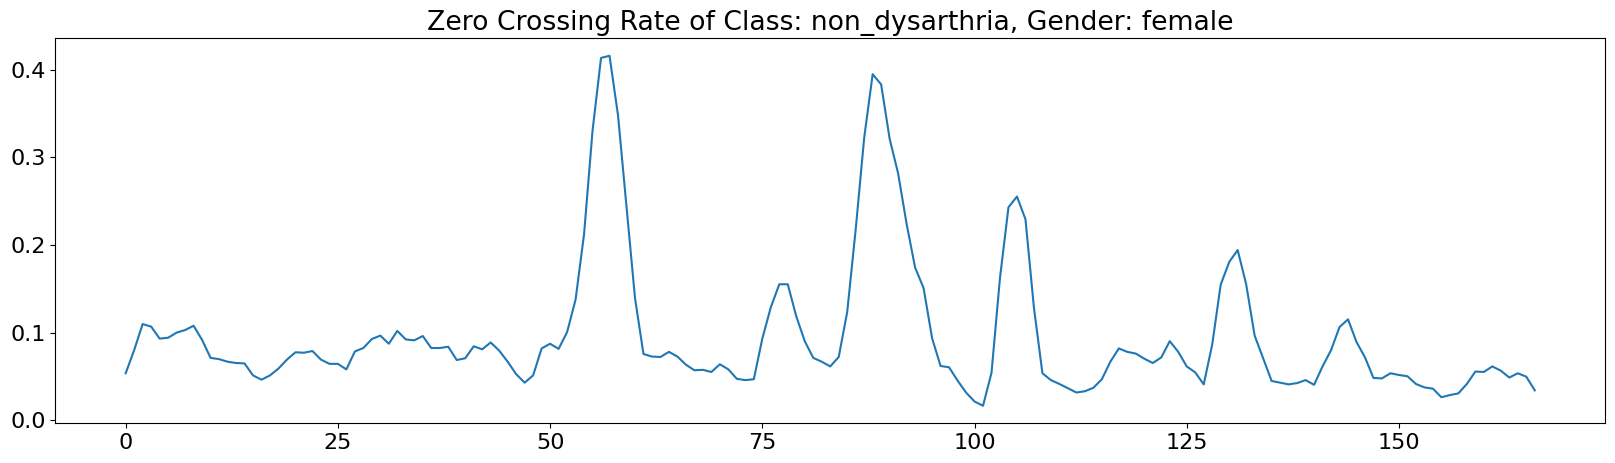

In [ ]:
show_zcr(male_dysarthric.iloc[0].filename, male_dysarthric.iloc[0].is_dysarthria, male_dysarthric.iloc[0].gender)
show_zcr(female_dysarthric.iloc[0].filename, female_dysarthric.iloc[0].is_dysarthria, female_dysarthric.iloc[0].gender)
show_zcr(male_ndysarthric.iloc[0].filename, male_ndysarthric.iloc[0].is_dysarthria, male_ndysarthric.iloc[0].gender)
show_zcr(female_ndysarthric.iloc[0].filename, female_ndysarthric.iloc[0].is_dysarthria, female_ndysarthric.iloc[0].gender)

## Spectral Centroid


TypeError: ignored

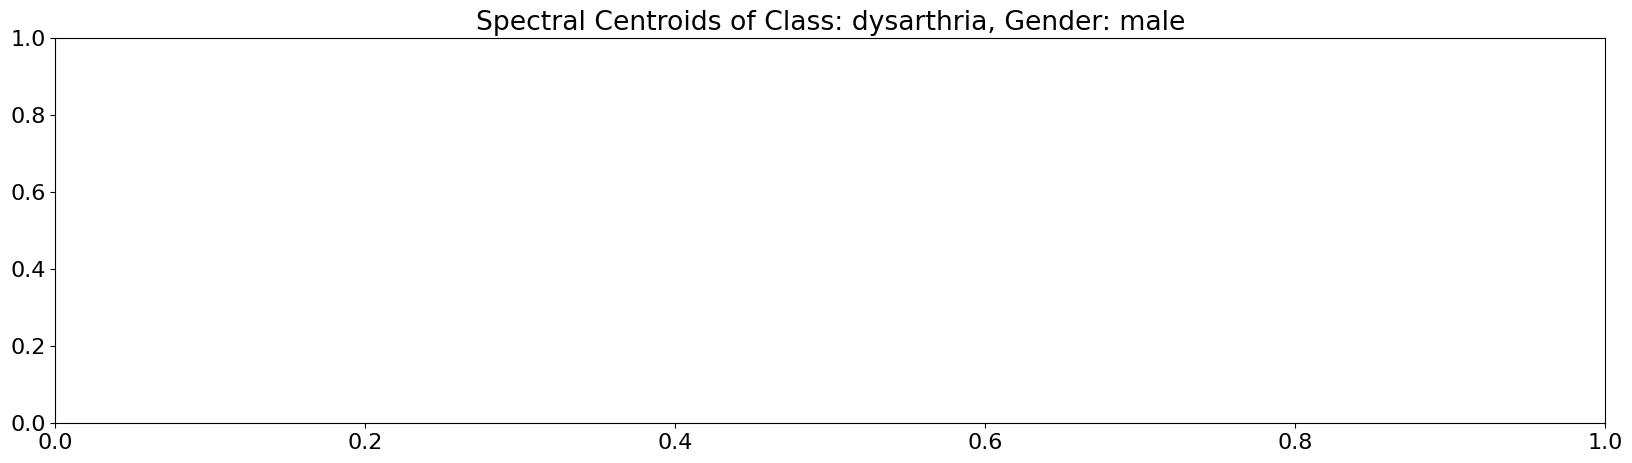

In [ ]:
show_spectral_centroids(male_dysarthric.iloc[0].filename, male_dysarthric.iloc[0].is_dysarthria, male_dysarthric.iloc[0].gender)
show_spectral_centroids(female_dysarthric.iloc[0].filename, female_dysarthric.iloc[0].is_dysarthria, female_dysarthric.iloc[0].gender)
show_spectral_centroids(male_ndysarthric.iloc[0].filename, male_ndysarthric.iloc[0].is_dysarthria, male_ndysarthric.iloc[0].gender)
show_spectral_centroids(female_ndysarthric.iloc[0].filename, female_ndysarthric.iloc[0].is_dysarthria, female_ndysarthric.iloc[0].gender)

## Spectral Rolloff


TypeError: ignored

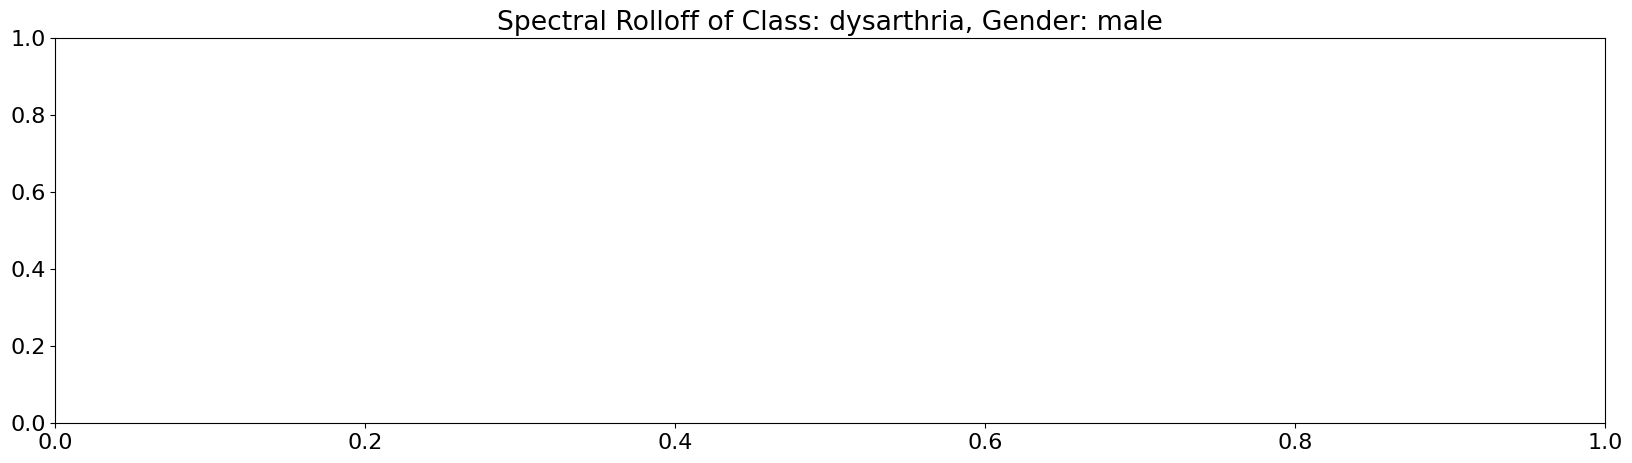

In [ ]:
show_spectral_rolloff(male_dysarthric.iloc[0].filename, male_dysarthric.iloc[0].is_dysarthria, male_dysarthric.iloc[0].gender)
show_spectral_rolloff(female_dysarthric.iloc[0].filename, female_dysarthric.iloc[0].is_dysarthria, female_dysarthric.iloc[0].gender)
show_spectral_rolloff(male_ndysarthric.iloc[0].filename, male_ndysarthric.iloc[0].is_dysarthria, male_ndysarthric.iloc[0].gender)
show_spectral_rolloff(female_ndysarthric.iloc[0].filename, female_ndysarthric.iloc[0].is_dysarthria, female_ndysarthric.iloc[0].gender)

## MFCCs


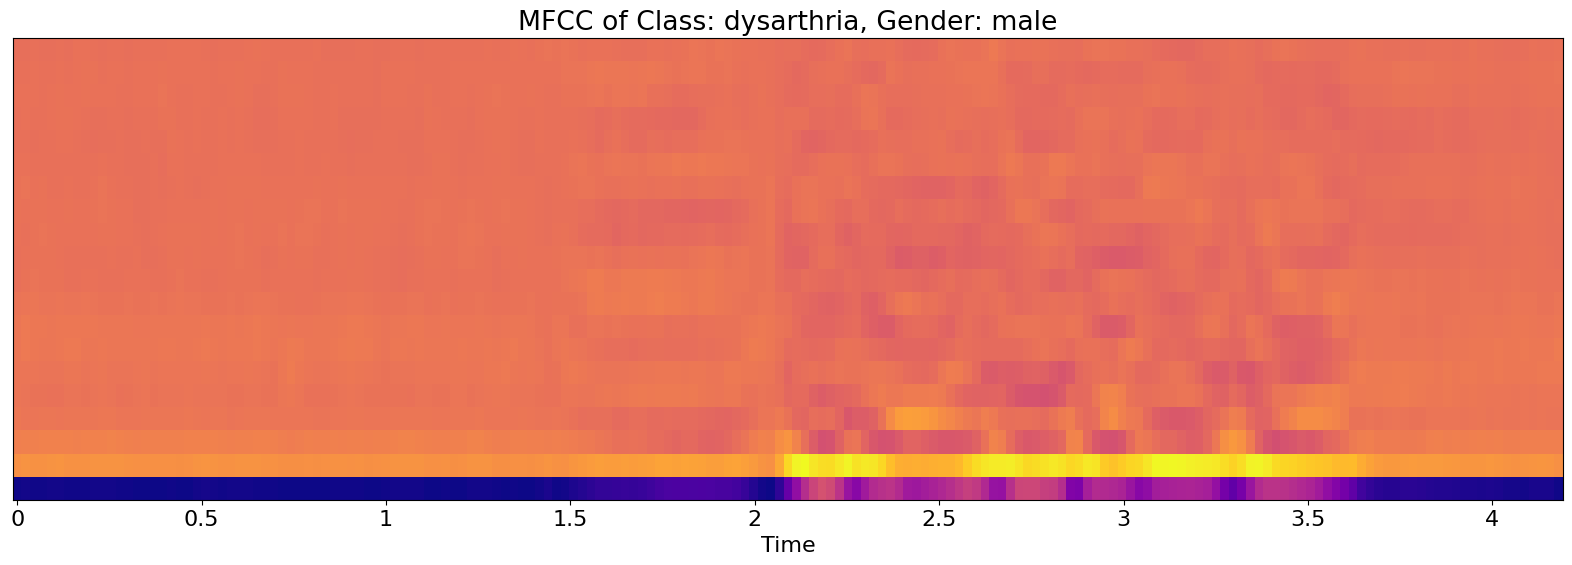

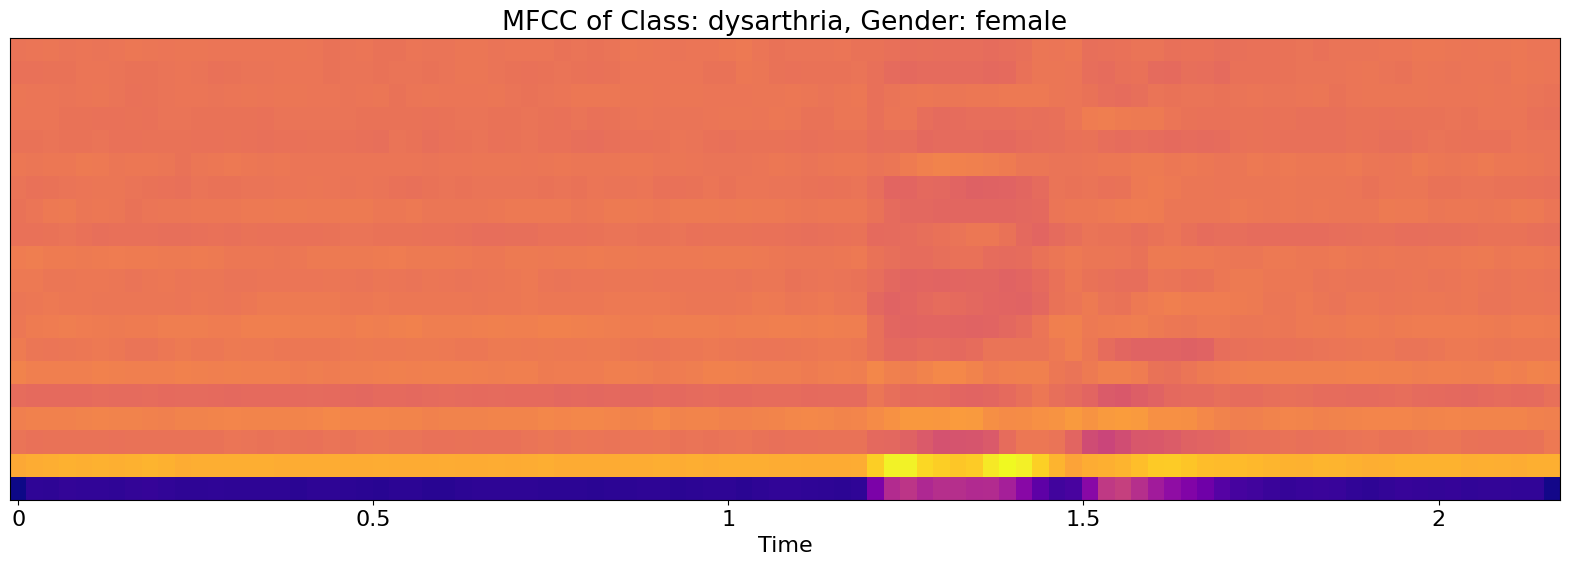

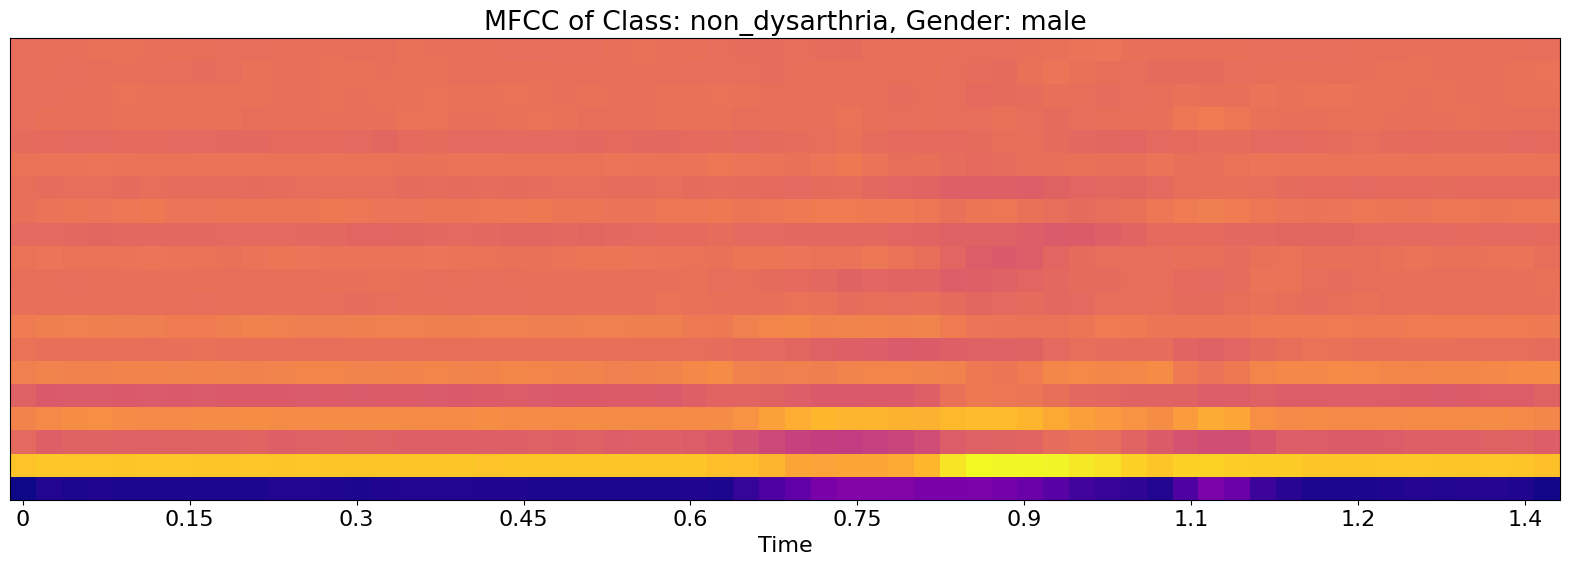

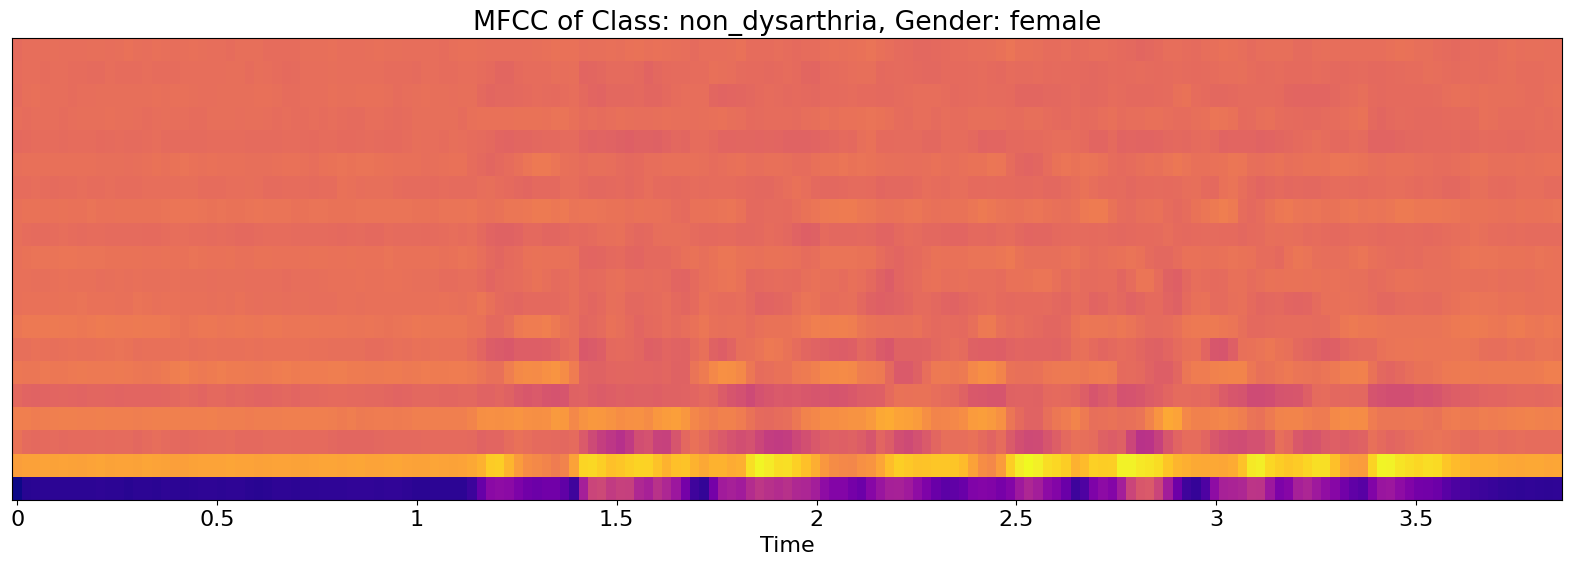

In [ ]:
show_mfccs(male_dysarthric.iloc[0].filename, male_dysarthric.iloc[0].is_dysarthria, male_dysarthric.iloc[0].gender)
show_mfccs(female_dysarthric.iloc[0].filename, female_dysarthric.iloc[0].is_dysarthria, female_dysarthric.iloc[0].gender)
show_mfccs(male_ndysarthric.iloc[0].filename, male_ndysarthric.iloc[0].is_dysarthria, male_ndysarthric.iloc[0].gender)
show_mfccs(female_ndysarthric.iloc[0].filename, female_ndysarthric.iloc[0].is_dysarthria, female_ndysarthric.iloc[0].gender)

## Mel Spectrogram


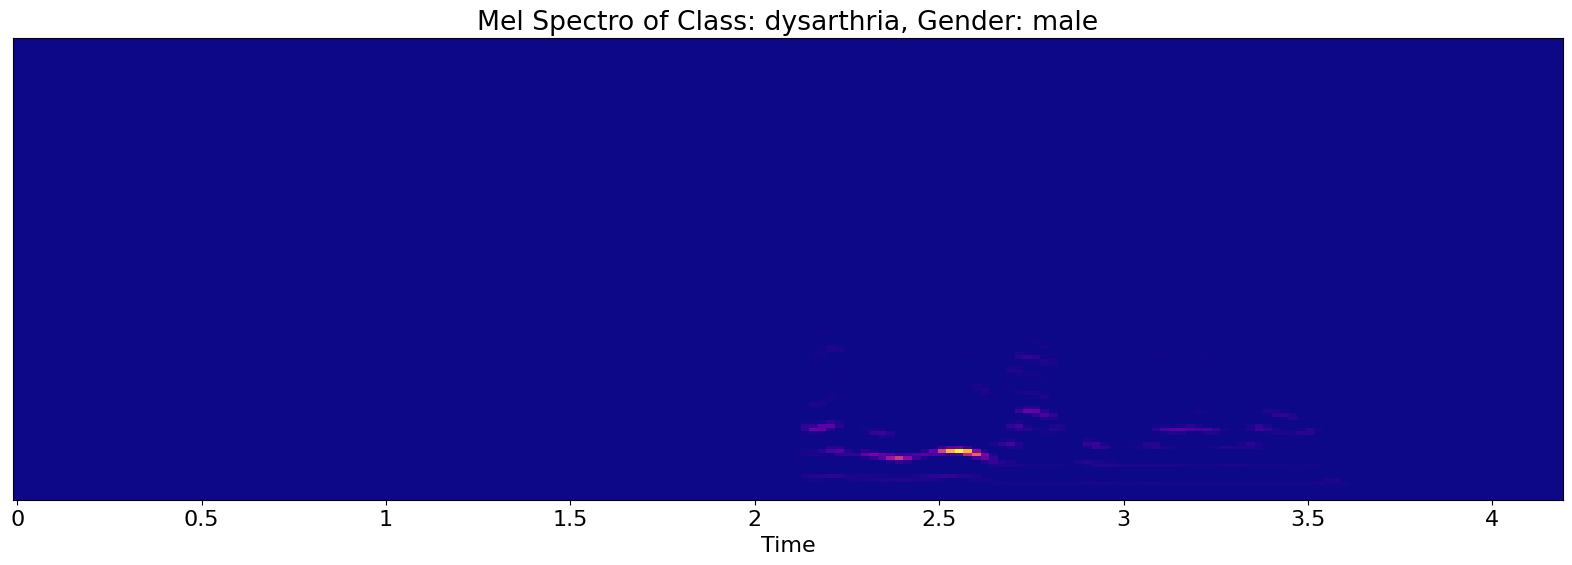

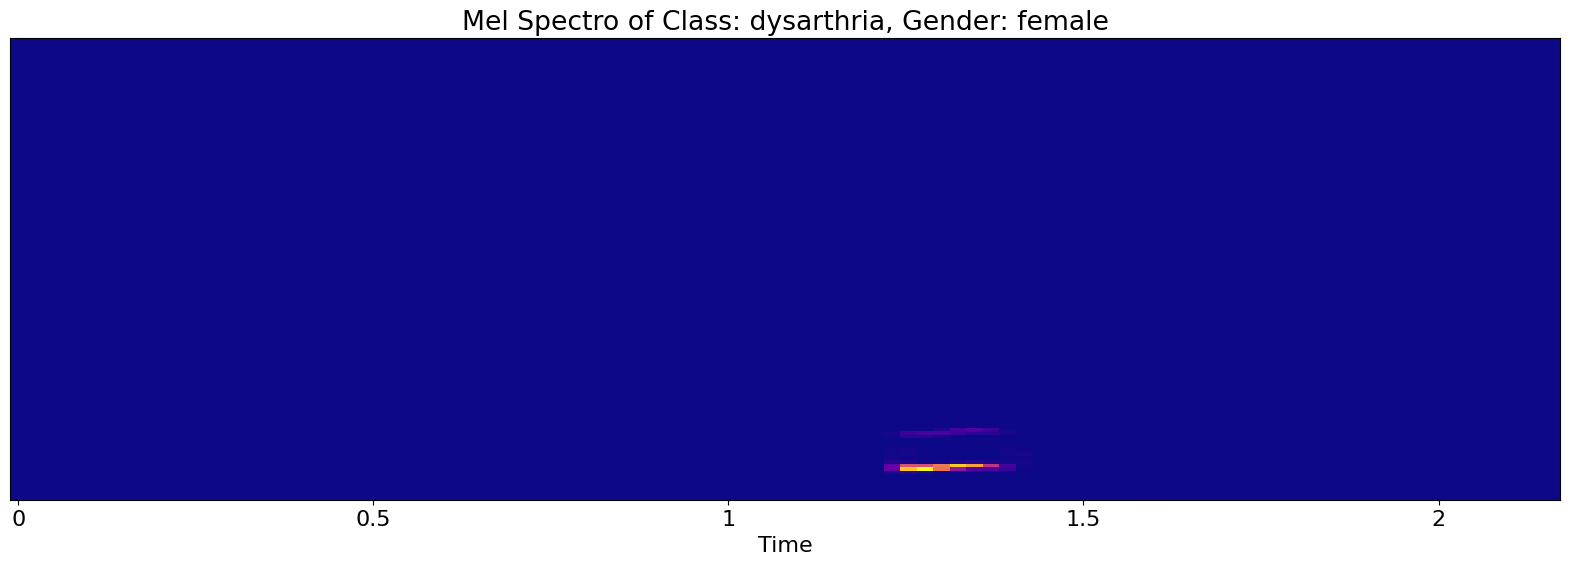

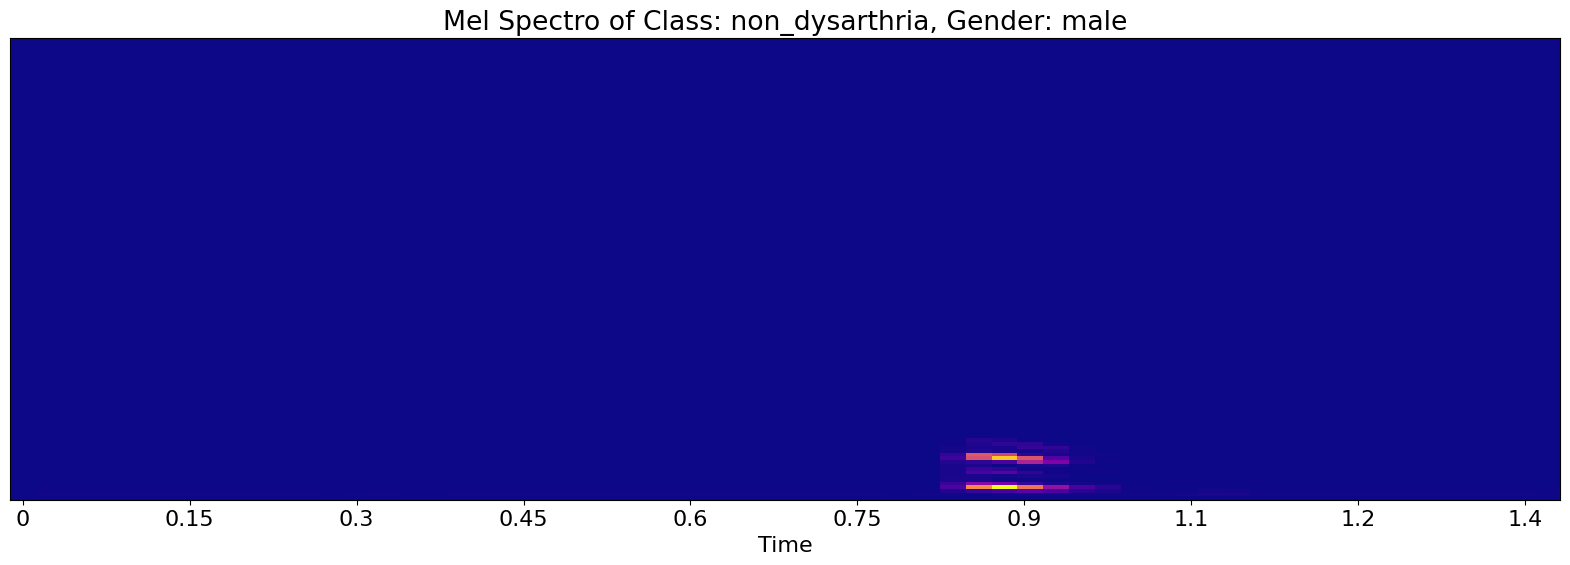

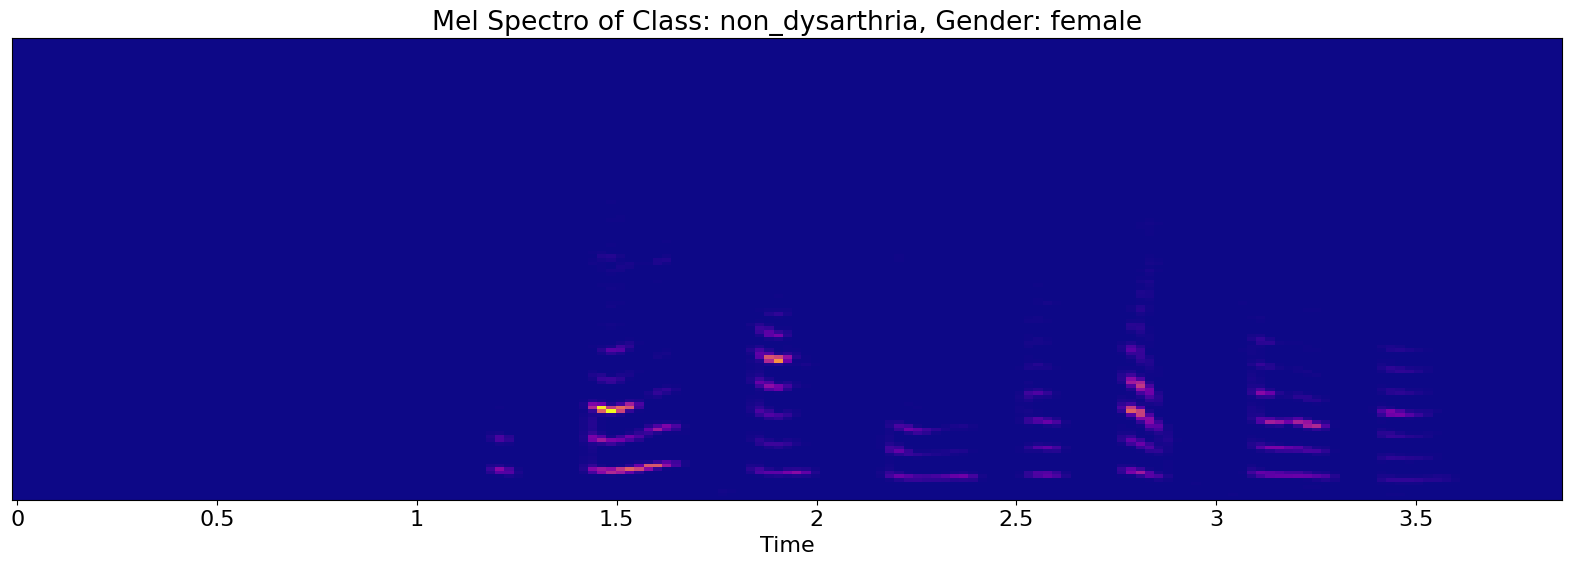

In [ ]:
show_melspectro(male_dysarthric.iloc[0].filename, male_dysarthric.iloc[0].is_dysarthria, male_dysarthric.iloc[0].gender)
show_melspectro(female_dysarthric.iloc[0].filename, female_dysarthric.iloc[0].is_dysarthria, female_dysarthric.iloc[0].gender)
show_melspectro(male_ndysarthric.iloc[0].filename, male_ndysarthric.iloc[0].is_dysarthria, male_ndysarthric.iloc[0].gender)
show_melspectro(female_ndysarthric.iloc[0].filename, female_ndysarthric.iloc[0].is_dysarthria, female_ndysarthric.iloc[0].gender)

# Feature Extraction
- Extracts 128 MFCC Features, which was the maximum possible features during the extraction process

In [ ]:
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, recall_score

In [ ]:
def feature_extraction(df):
    features = []
    for i,record in tqdm(df.iterrows(),total=df.shape[0]):
        try:
            x , sr = librosa.load(record['filename'])
            mean_mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=128),axis=1)
            features.append(mean_mfcc)
        except EOFError:
            pass

    dataf = pd.DataFrame(features)
    dataf['class'] = df['is_dysarthria']
    return dataf

In [ ]:
dataf = feature_extraction(data)

100%|██████████| 2000/2000 [00:48<00:00, 41.27it/s]


In [ ]:
dataf

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,class
0,-221.788269,101.259232,-16.548132,38.492065,-13.595653,20.772554,-5.536349,10.410690,1.962461,-0.799047,...,0.962193,0.744855,1.058080,0.388451,0.081758,0.546172,0.594357,0.170033,-0.219215,non_dysarthria
1,-299.520081,109.872574,-17.097269,38.854969,-16.881130,22.959133,1.824228,18.724188,3.448541,4.455822,...,1.105589,1.056284,1.252576,0.027333,-1.368948,-0.037859,0.020661,-0.082124,-0.744832,non_dysarthria
2,-302.950043,112.048477,-23.679882,44.887413,-22.434727,26.299335,0.811477,18.210291,4.344697,4.912156,...,0.844332,0.530004,1.018391,0.055385,-1.472088,0.295324,0.191228,-0.224301,-0.582725,non_dysarthria
3,-210.861603,116.504486,-35.046494,37.670425,-27.112516,25.593727,-7.511986,13.140750,-0.587347,4.138087,...,0.630752,0.898457,0.721398,0.174576,-0.090706,0.001524,0.360464,-0.075448,-0.259715,non_dysarthria
4,-280.227203,104.505035,-17.209877,45.064884,-15.542122,28.115068,-3.449209,16.841436,4.573242,1.738296,...,1.596206,0.970084,0.732015,0.547593,-0.152664,0.131893,-0.288228,-0.468570,-0.461726,non_dysarthria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,-304.231995,115.359306,-0.794746,26.543352,-0.682190,13.183387,2.389222,4.290236,-1.372811,-2.624718,...,0.473923,0.103740,0.311737,0.015566,-0.055351,0.193023,0.332826,0.014455,-0.221991,dysarthria
1995,-457.822144,110.087799,22.221985,-0.056086,-11.181323,3.190089,-4.499060,4.474746,5.809545,-1.913331,...,0.622933,0.508349,0.398737,0.455839,0.348571,0.286893,0.150862,-0.052999,0.001199,dysarthria
1996,-371.546875,116.846909,5.667272,22.488144,8.221014,7.740131,8.989120,9.996635,4.383992,3.590931,...,0.240280,-0.009779,-0.018253,-0.014393,-0.263360,0.556257,0.749682,-0.283888,-0.398581,dysarthria
1997,-302.500702,112.511192,-4.506540,32.498363,-1.519380,4.109807,4.611475,9.744307,-2.962905,-3.497744,...,0.146675,-0.200982,0.388719,0.160434,-0.383473,0.417755,1.042827,-0.082762,-0.111990,dysarthria


In [ ]:
dataf.loc[dataf['class']=='non_dysarthria','class'] = 0.0
dataf.loc[dataf['class']=='dysarthria','class'] = 1.0
dataf['class'] = dataf['class'].astype(float)

X = dataf.iloc[:,:-1].values
y = dataf.iloc[:,-1]

In [ ]:
X.shape, y.shape

((1999, 128), (1999,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
X_train = X_train.reshape(-1,16,8,1)
X_test = X_test.reshape(-1,16,8,1)

# Modelling

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
model = Sequential([
    InputLayer(input_shape=(16, 8, 1)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = "same"),
    MaxPooling2D(2, 2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = "same"),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 8, 32)         320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 4, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 4, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 2, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 32)                1

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_name = "model.h5"
checkpoint = ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test,y_test), callbacks=[checkpoint,earlystopping])

Epoch 1/50
53/57 [==========================>...] - ETA: 0s - loss: 0.6005 - accuracy: 0.7134
Epoch 1: val_loss improved from inf to 0.42711, saving model to model.h5
57/57 [==============================] - 3s 25ms/step - loss: 0.5914 - accuracy: 0.7165 - val_loss: 0.4271 - val_accuracy: 0.8050
Epoch 2/50
55/57 [===========================>..] - ETA: 0s - loss: 0.3685 - accuracy: 0.8358
Epoch 2: val_loss improved from 0.42711 to 0.32193, saving model to model.h5
57/57 [==============================] - 1s 14ms/step - loss: 0.3699 - accuracy: 0.8355 - val_loss: 0.3219 - val_accuracy: 0.8550
Epoch 3/50
56/57 [============================>.] - ETA: 0s - loss: 0.2439 - accuracy: 0.9096
Epoch 3: val_loss improved from 0.32193 to 0.18159, saving model to model.h5
57/57 [==============================] - 1s 15ms/step - loss: 0.2435 - accuracy: 0.9094 - val_loss: 0.1816 - val_accuracy: 0.9250
Epoch 4/50
54/57 [===========================>..] - ETA: 0s - loss: 0.1730 - accuracy: 0.9387
Epoch 4

# Model Summary




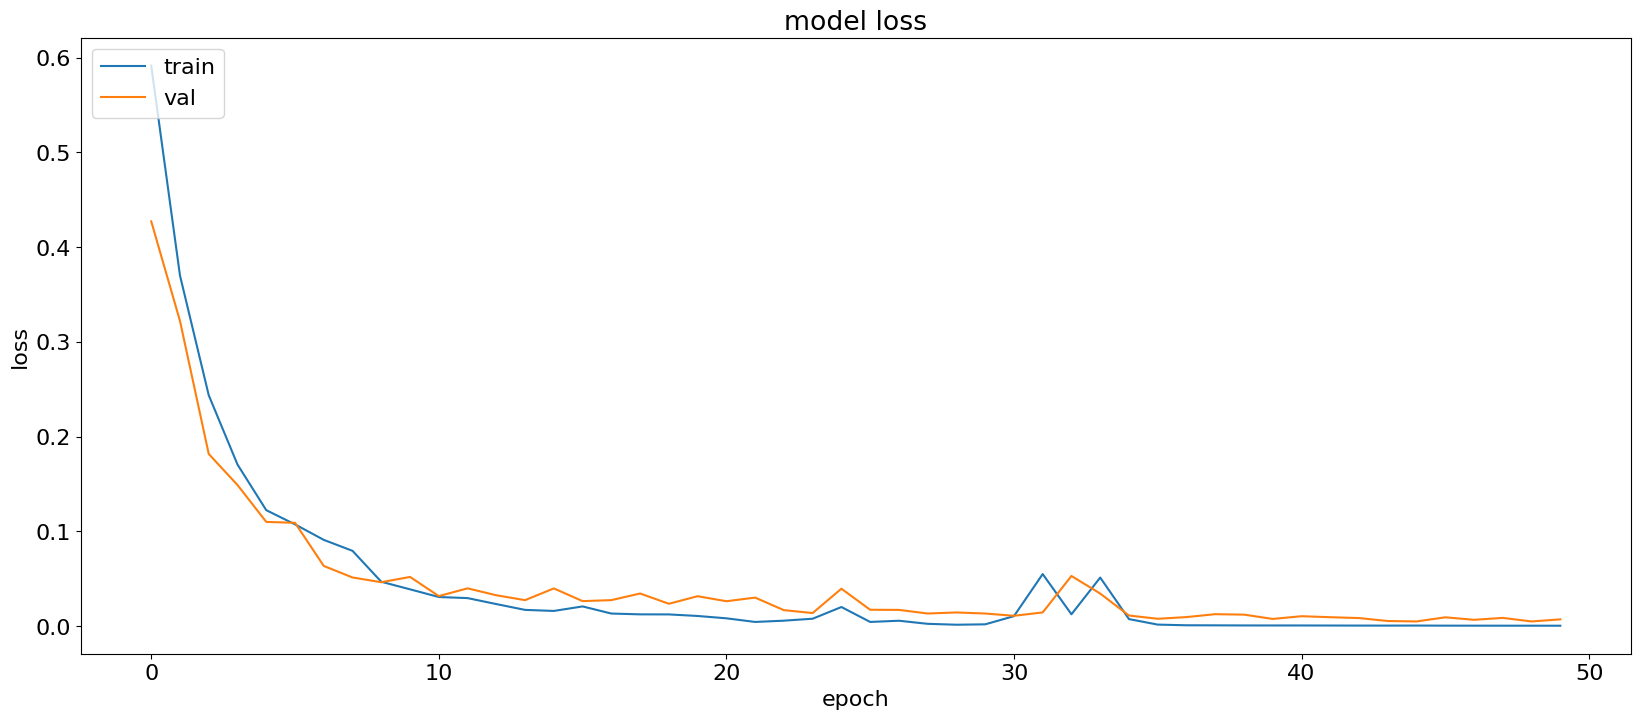

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

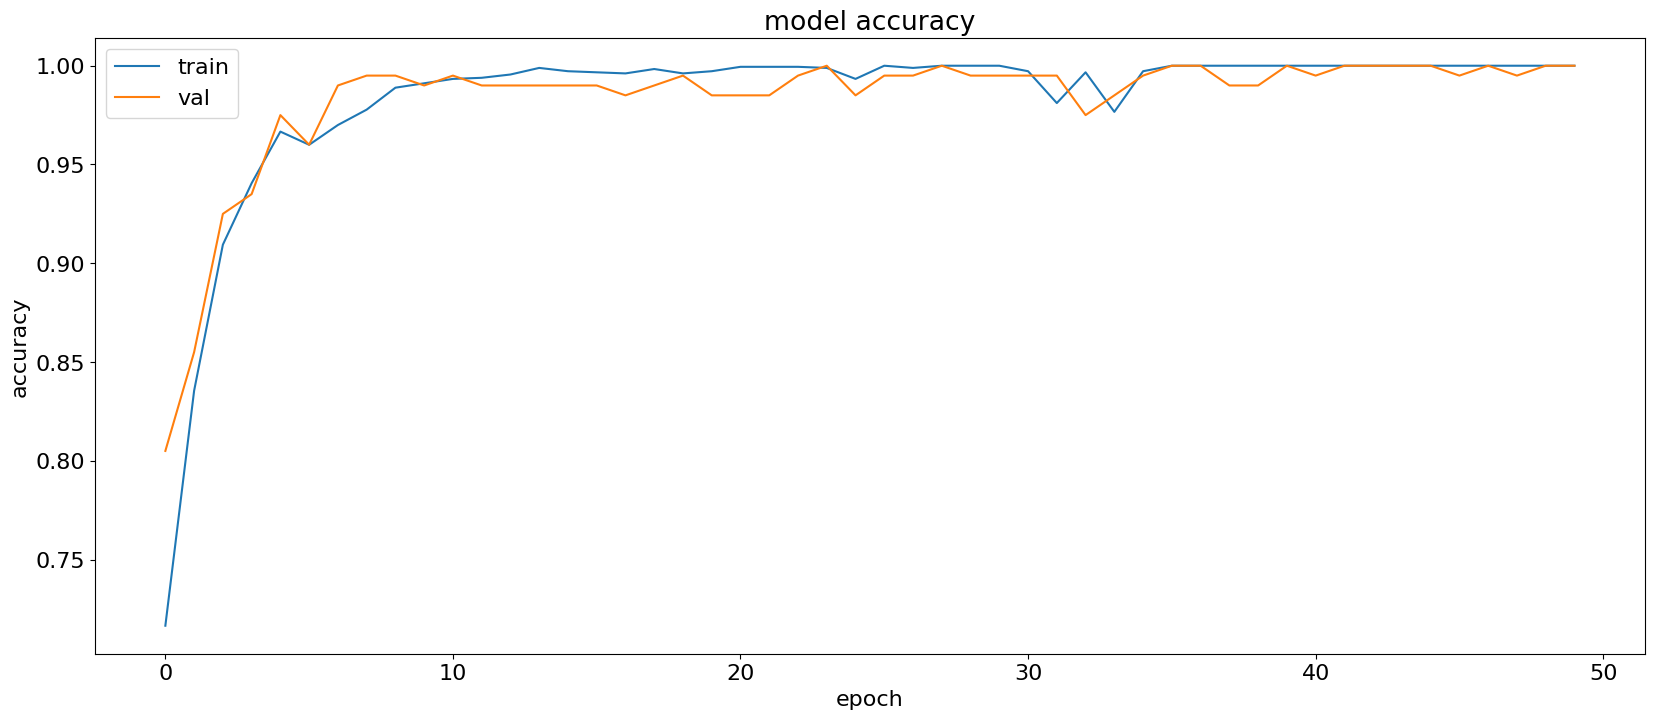

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 5ms/step


## ROC Curve and AUC Score


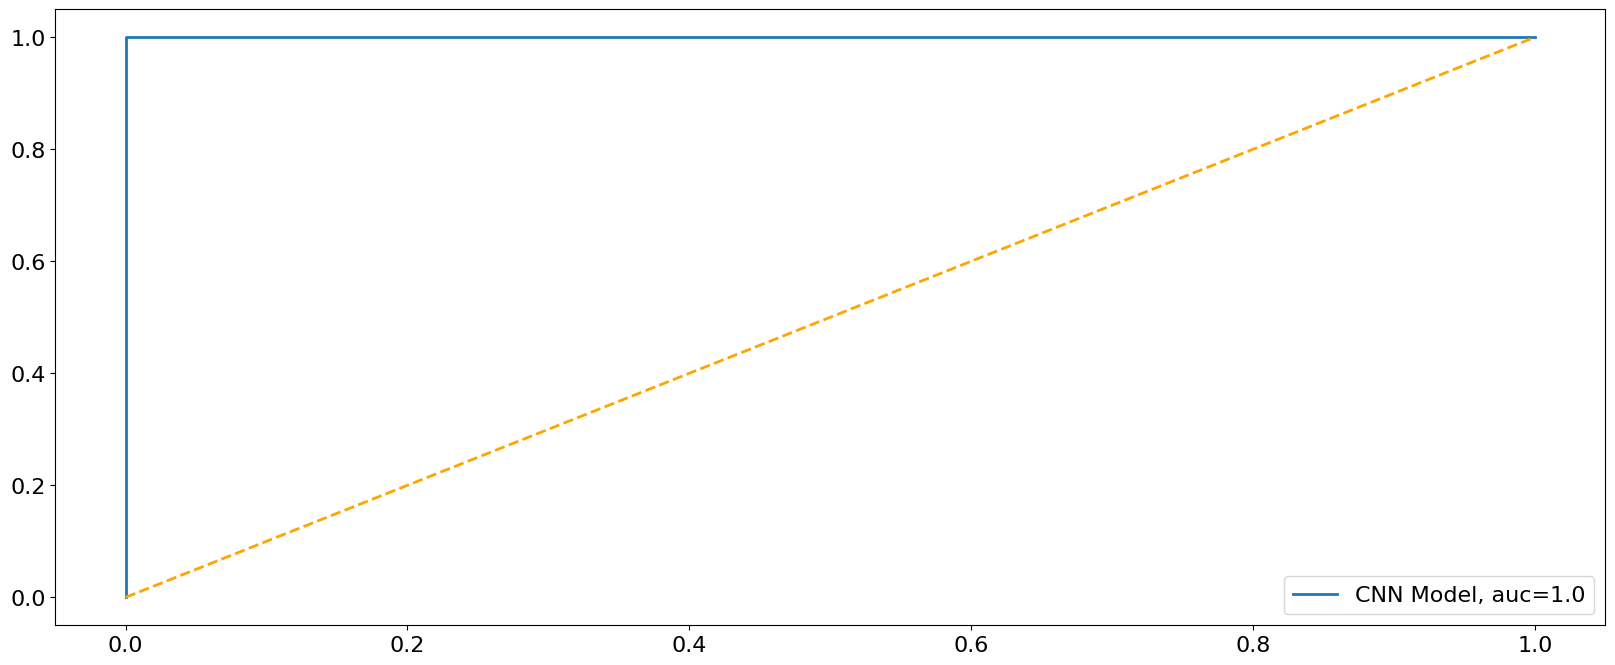

In [ ]:
plt.figure(figsize=(20,8))
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="CNN Model, auc="+str(auc),lw=2)
plt.plot([0, 1], [0, 1], color="orange", lw=2, linestyle="--")
plt.legend(loc=4)
plt.show()

In [ ]:
y_pred[y_pred>=0.5] = 1
y_pred[y_pred<0.5] = 0

# Confusion Matrix

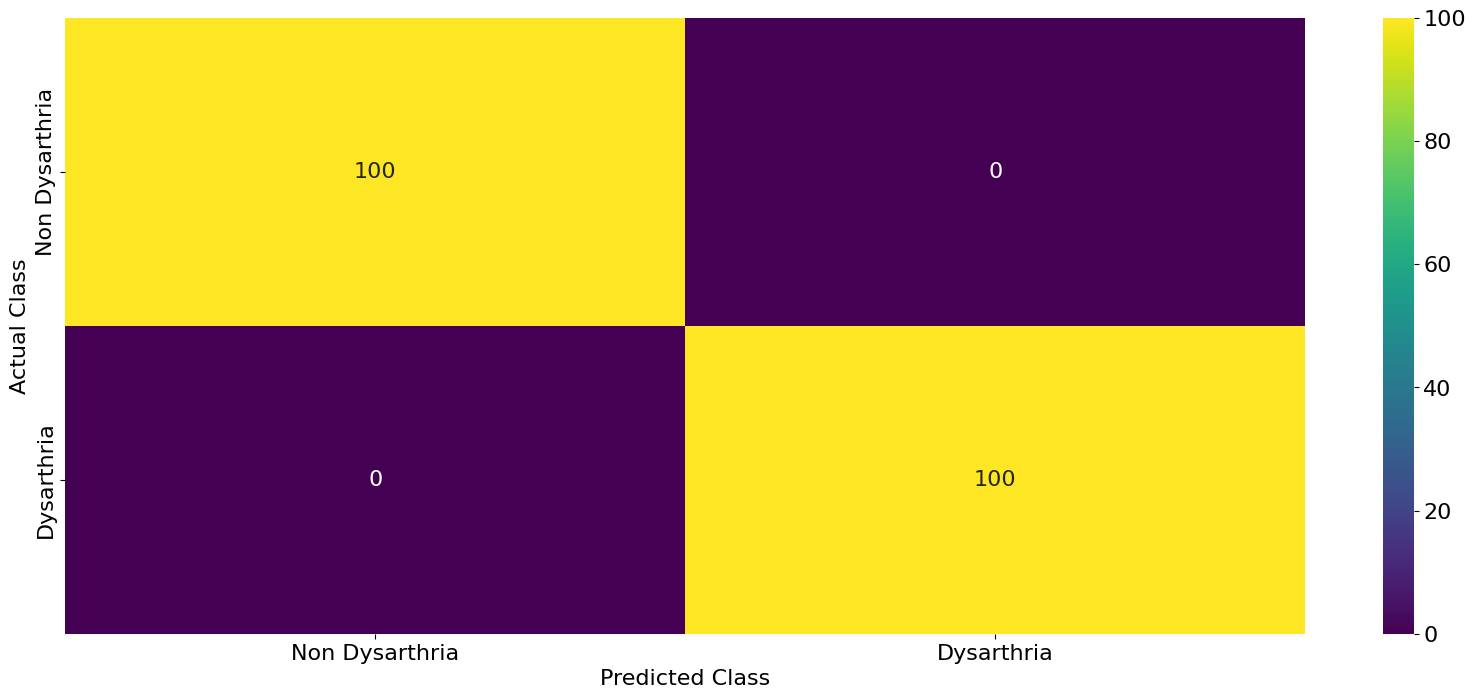

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred),cmap='viridis',annot=True,fmt='.3g',
            xticklabels=['Non Dysarthria','Dysarthria'],yticklabels=['Non Dysarthria','Dysarthria'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

## Classification Report


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       100
         1.0       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
print("Recall Score of the Model: ",recall_score(y_test,y_pred))

Recall Score of the Model:  1.0
